#  CAR PRICE PREDICTION WITH MACHINE LEARING

## IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:

# Load the car price dataset
file_path = 'C:\\Users\\murug\\OneDrive\\Desktop\\car data.csv'  # Adjust the path as necessary
df = pd.read_csv('C:\\Users\\murug\\OneDrive\\Desktop\\car data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)



Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)



Missing values in each column:
Year                       0
Selling_Price              0
Present_Price              0
Driven_kms                 0
Owner                      0
                          ..
Car_Name_xcent             0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Selling_type_Individual    0
Transmission_Manual        0
Length: 106, dtype: int64


## Split the data into features and target


In [10]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")
print(f"Model R^2 Score: {r2:.2f}")


Model Mean Squared Error: 0.75
Model R^2 Score: 0.97


## Visualizations

### 1.Bar chart of feature importances

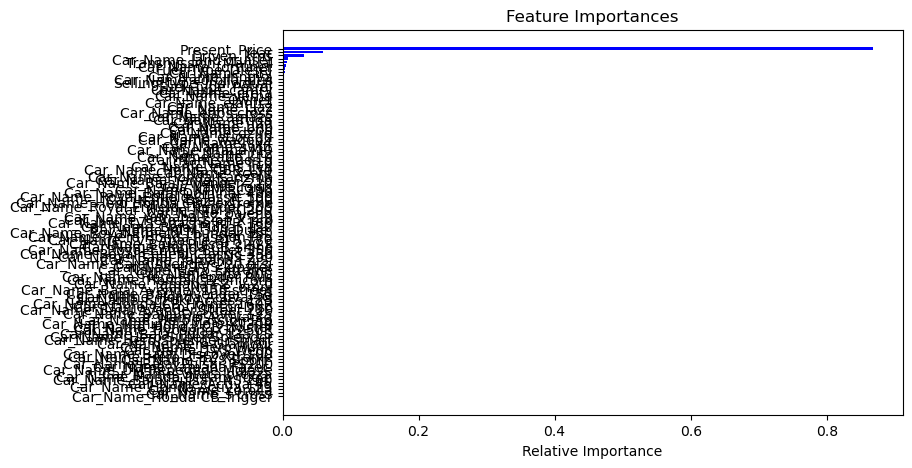

In [12]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 2.Histograms of each feature

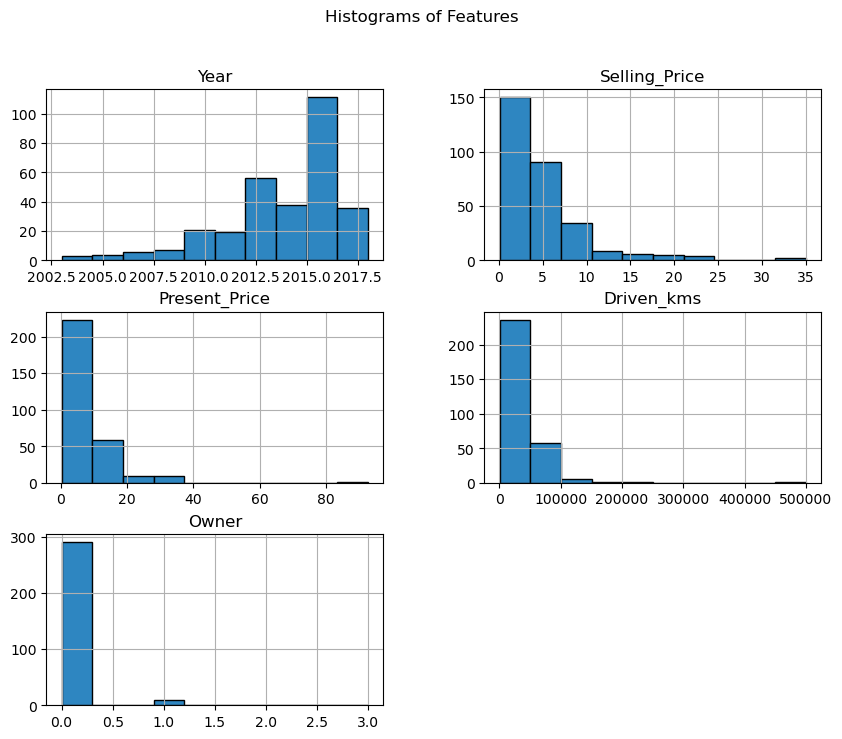

In [13]:
df.hist(figsize=(10, 8), bins=10, color='#2E86C1', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()


### 3.Correlation heatmap

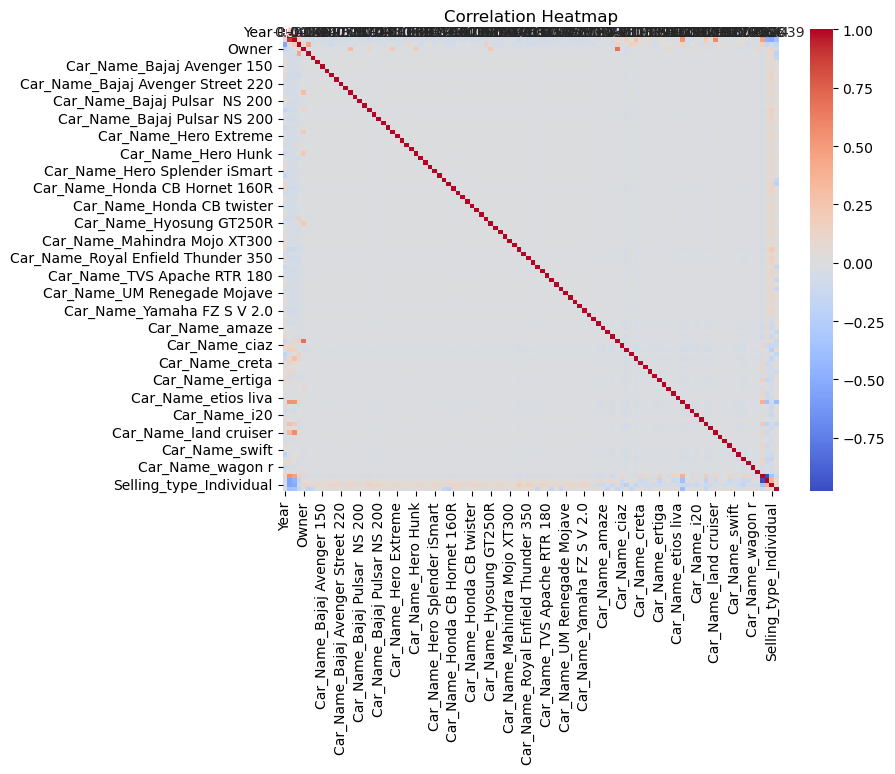

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### 4.2D Scatter plot: Selling_Price vs Present_Price

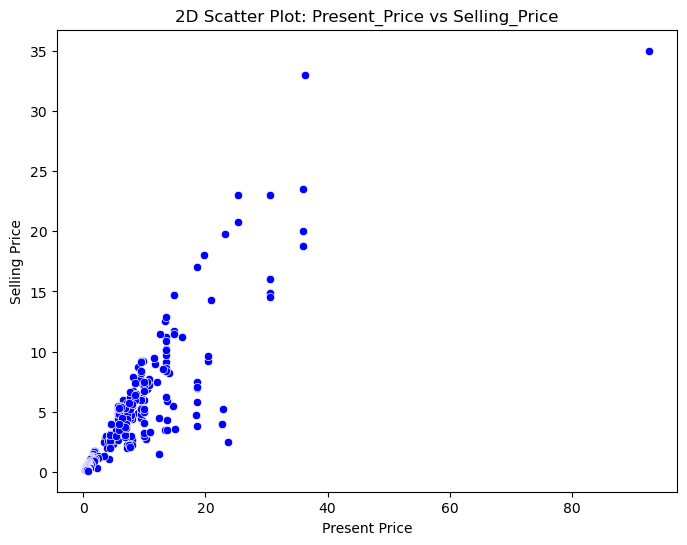

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, color='blue')
plt.title('2D Scatter Plot: Present_Price vs Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


### 5.Actual vs Predicted Selling Price Scatter plot

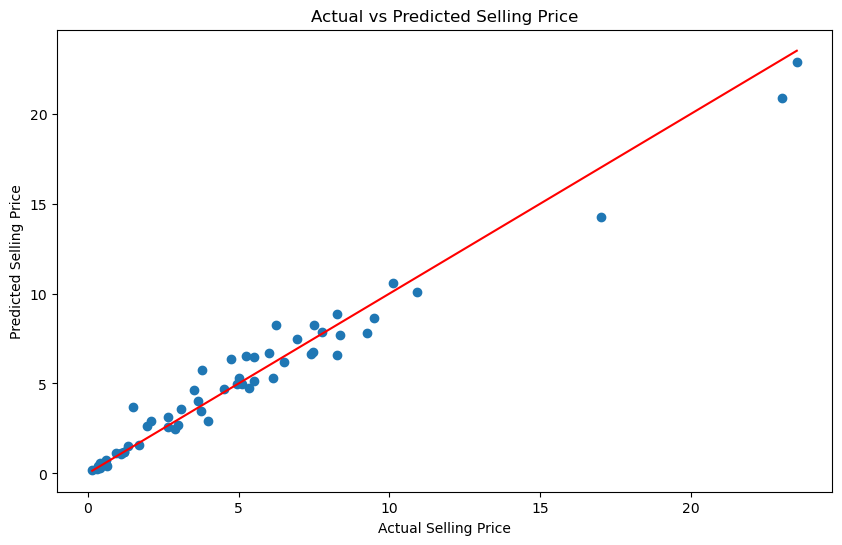

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()